<a href="https://colab.research.google.com/github/HSS107048212/Neil/blob/main/Unsupervised_learning_in_GAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.6 MB/s eta 0:00:00
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=9fc6ede4551a95624a0145aa07673fb80530a8fa01e03bd7911e60645eca6942
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=464e26ddef4b16ad417a4041eaaab994588aa02430524c932325816a3e45060f
  Stored in directory: /root/.cache/pip/wheels/c9/dd

In [4]:
import torch_geometric

In [41]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from sklearn.cluster import KMeans
import numpy as np

# 假設的圖形數據
num_nodes = 10  # 節點數量
num_features = 16  # 每個節點的特徵數量
num_classes = 3  # 最終的聚類數量

# 生成節點特徵
features = torch.rand((num_nodes, num_features))

# 隨機生成邊
edges = torch.randint(0, num_nodes, (2, 2 * num_nodes))

# 定義 GAT 模型
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# 初始化模型
model = GAT(num_features, 8, num_classes)

# 模擬訓練過程（這裡僅為展示，不執行實際的訓練）
# 假設 'data' 是一個包含節點特徵和邊索引的對象
# data.x = features
# data.edge_index = edges

# 假設的節點表示（經過模型學習後的特徵）
node_embeddings = torch.rand((num_nodes, num_classes))  # 使用隨機數據代替實際模型輸出

# 使用 K-means 進行聚類
kmeans = KMeans(n_clusters=num_classes)
cluster_ids = kmeans.fit_predict(node_embeddings.numpy())




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


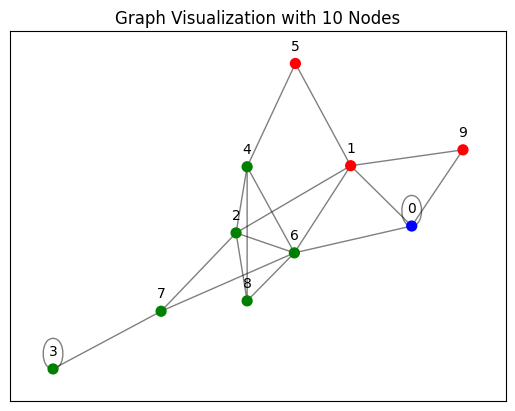

In [50]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import torch

# Convert edges to a list of tuples
edge_list = edges.t().numpy().tolist()

# Create a graph
G = nx.Graph()
# Explicitly add nodes to ensure every node is included, even if isolated
G.add_nodes_from(range(num_nodes))  # Ensure this matches your actual node count
G.add_edges_from(edge_list)

# Position nodes using the spring layout
pos = nx.spring_layout(G, seed=42)  # Optional: seed for reproducibility

# Map each cluster ID to a color
colors = ['red', 'green', 'blue', 'yellow']
node_colors = [colors[cluster_id] for cluster_id in cluster_ids]

# Ensure all nodes are accounted for in the color mapping
assert len(node_colors) == len(G.nodes()), "Node color mapping size mismatch."

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Annotating num_nodes in the plot
plt.title(f"Graph Visualization with {num_nodes} Nodes")

# Optional: Displaying a few positions as sample (not recommended for all due to clutter)
# Select a few nodes to annotate their positions (e.g., node 0, node 10, node 20)
for node in range(num_nodes):  # Corrected to use range(num_nodes) for iteration
    if node in pos:
        # Annotate the position
        plt.annotate(f"{node}",  # This shows node index and position
                     xy=pos[node],
                     textcoords="offset points",
                     xytext=(0,10),  # Distance from the text to the point
                     ha='center')



In [43]:
pos

{0: array([ 0.60896037, -0.00833997]),
 1: array([0.33517799, 0.22415757]),
 2: array([-0.17894198, -0.03481128]),
 3: array([-1.        , -0.55919194]),
 4: array([-0.12932767,  0.22008746]),
 5: array([0.08721615, 0.61825254]),
 6: array([ 0.08259153, -0.11178467]),
 7: array([-0.51526795, -0.33687557]),
 8: array([-0.12927788, -0.29684091]),
 9: array([0.83886944, 0.28534677])}

In [44]:
edge_list

[[7, 2],
 [6, 7],
 [1, 0],
 [6, 1],
 [7, 3],
 [4, 8],
 [1, 2],
 [4, 5],
 [9, 1],
 [4, 6],
 [0, 0],
 [6, 2],
 [4, 2],
 [0, 6],
 [5, 1],
 [3, 3],
 [2, 8],
 [0, 9],
 [9, 0],
 [6, 8]]